In [ ]:
!pip install pandas matplotlib yfinance statsmodels openpyxl

In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


In [5]:
# Example: Get data for INFY (Infosys)
stock_symbol = 'INFY.NS'  # Add .NS for Indian stocks
df = yf.download(stock_symbol, start="2018-01-01", end="2024-12-31")

# Keep only Date and Close
df = df[['Close']]
df.dropna(inplace=True)
df.head()


C:\Users\anush\AppData\Local\Temp\ipykernel_58124\1688773008.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_symbol, start="2018-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,INFY.NS
Date,
2018-01-01,429.768463
2018-01-02,428.167511
2018-01-03,424.674622
2018-01-04,422.221344
2018-01-05,420.807556


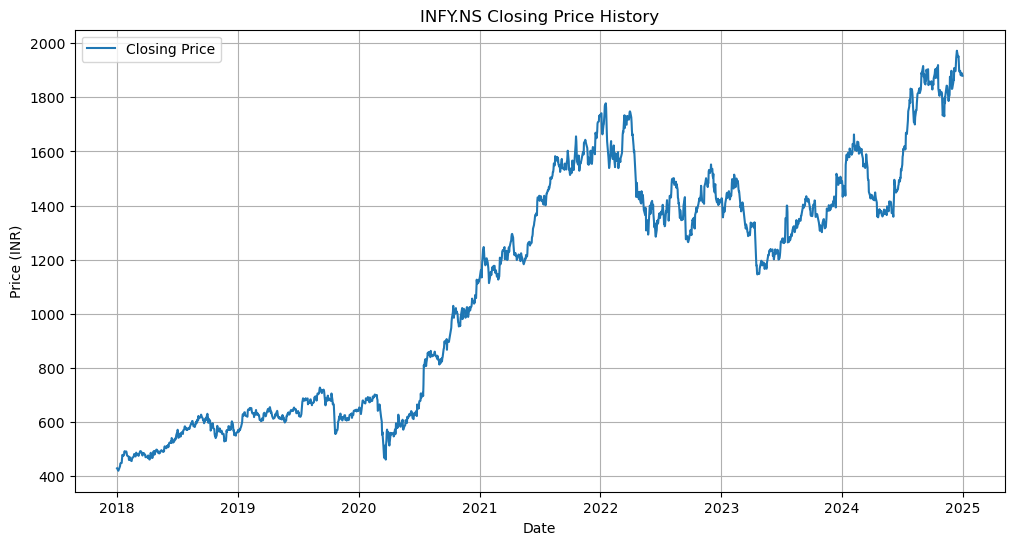

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Closing Price')
plt.title(f"{stock_symbol} Closing Price History")
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid()
plt.show()


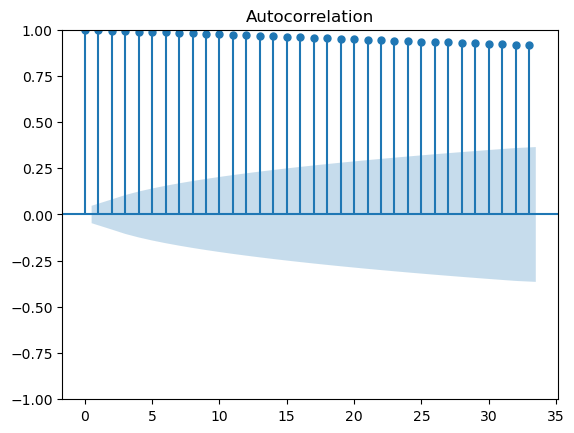

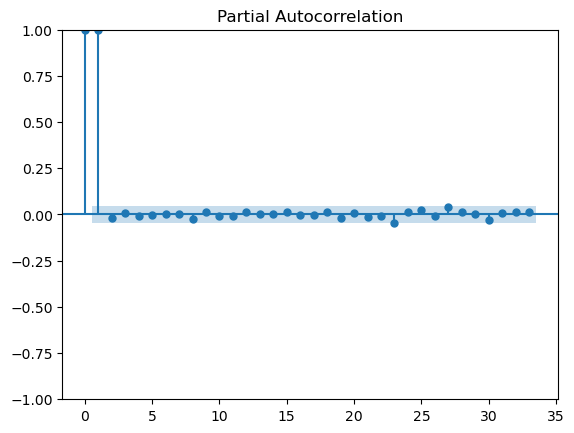

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Close'])
plot_pacf(df['Close'])
plt.show()

# Optional: log transformation or differencing
diff = df['Close'].diff().dropna()


In [13]:
train_size = int(len(df) * 0.80)
train, test = df['Close'][:train_size], df['Close'][train_size:]


In [15]:
model = ARIMA(train, order=(5, 1, 0))  # (p, d, q)
model_fit = model.fit()
print(model_fit.summary())


C:\Users\anush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\anush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\anush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                INFY.NS   No. Observations:                 1380
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5919.645
Date:                Tue, 22 Jul 2025   AIC                          11851.291
Time:                        20:09:58   BIC                          11882.666
Sample:                             0   HQIC                         11863.028
                               - 1380                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0470      0.020      2.322      0.020       0.007       0.087
ar.L2         -0.0158      0.021     -0.739      0.460      -0.058       0.026
ar.L3          0.0072      0.022      0.327      0.7

C:\Users\anush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\anush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


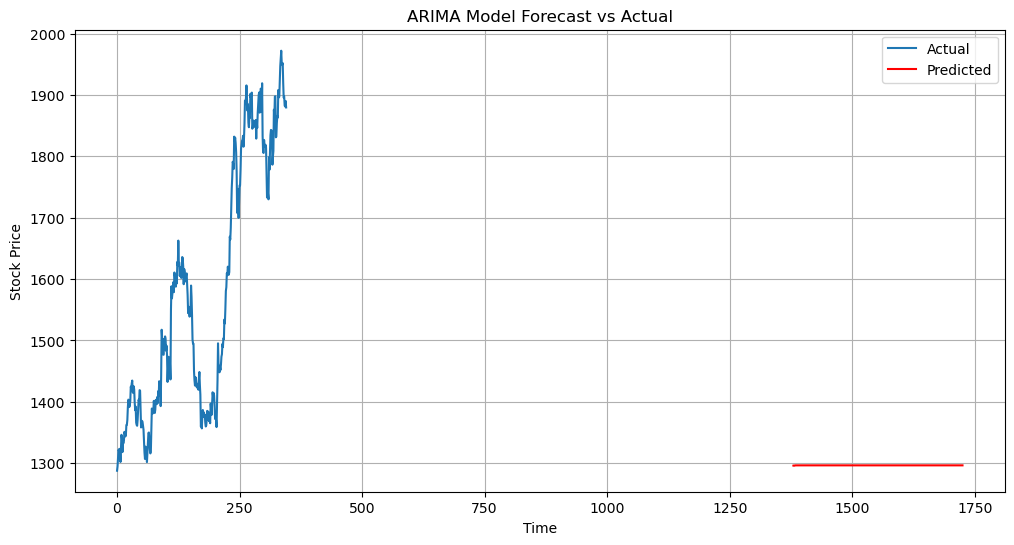

In [17]:
forecast = model_fit.forecast(steps=len(test))
test = test.reset_index(drop=True)

plt.figure(figsize=(12,6))
plt.plot(test, label='Actual')
plt.plot(forecast, label='Predicted', color='red')
plt.title("ARIMA Model Forecast vs Actual")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.show()


In [19]:
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")


Root Mean Squared Error: 347.42
Mean Absolute Error: 280.37


In [23]:
# Flatten the arrays to make them 1D
results = pd.DataFrame({
    'Actual': test.values.ravel(),         # if test is a Series or DataFrame
    'Predicted': forecast.values.ravel()   # if forecast is a Series or ndarray
})

# Export to Excel
results.to_excel("arima_forecast_output.xlsx", index=False)
print("Exported results to Excel.")


Exported results to Excel.


In [25]:
import pandas as pd

# Flatten forecast and test arrays
results = pd.DataFrame({
    'Actual': test.values.ravel(),
    'Predicted': forecast.values.ravel()
})

# Export to Excel
results.to_excel("arima_forecast_output.xlsx", index=False)
print("Excel file saved successfully!")


Excel file saved successfully!
